## Objective: 
Objective of this model is to predict whether the customer is prone to churn from the existing network to new network or not.

## Project Plan :

### Analyzing and Importing data:
Importing data and analyzing it to extract insights that supports for decision making process (like obtaining dependent and independent variables).



### Data Cleansing:
-Check nulls (If null: Delete the row or replace with mean, median or mode)<br>
-Foreign values<br>
-Check voids<br>
-Wrong format data

### Minimize the Dimension of Dataframe:
-Check correlation between columns<br>
-Pearson correlation is used to check correlation between two continuous column.<br>
-Highly correlated columns are obtained and one of them are dropped.<br>

### Encoding Data: 

Categorical data is encoded (using label or one hot encoding based on the requirement) so that they’re easily readable by the machines. 

### Model building: 

-Splitting the data into train and test data sets <br>
-Train the model using decision tree classifier <br>
-Fit the data into the model <br>
-Predicting the response of the test dataset<br> 
-Evaluating accuracy of the model <br>

### Optimizing the Model performance: 

-Gini and Entropy algorithms are used to optimize the performance of the model developed. <br>
-Maximum depth is given for the decision tree to avoid overfitting and underfitting

### Importing libraries

In [17]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
import plotly.express as px #Visualization
import plotly.graph_objs as go #Visualization
import os

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## for explainer
#from lime import lime_tabular


pd.options.plotting.backend = "plotly" 
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [18]:
df=pd.read_csv('Churn.csv')
df.head()

,c_AreaCode,c_InternationalPlan,c_Phone,c_State,c_VMailPlan,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayCharge,q_DayMins,...,q_EveCharge,q_EveMins,q_InternationalCharge,q_InternationalMins,q_Internationalcalls,q_NightCalls,q_NightCharge,q_NightMins,q_VMailMessage,y_Churn
0,415,no,382-4657,KS,yes,128,1,110,45.07,265.1,...,16.78,197.4,2.70,10.0,3,91,11.01,244.7,25,False.
1,415,no,371-7191,OH,yes,107,1,123,27.47,161.6,...,16.62,195.5,3.70,13.7,3,103,11.45,254.4,26,False.
2,415,no,358-1921,NJ,no,137,0,114,41.38,243.4,...,10.30,121.2,3.29,12.2,5,104,7.32,162.6,0,False.
3,408,yes,375-9999,OH,no,84,2,71,50.90,299.4,...,5.26,61.9,1.78,6.6,7,89,8.86,196.9,0,False.
4,415,yes,330-6626,OK,no,75,3,113,28.34,166.7,...,12.61,148.3,2.73,10.1,3,121,8.41,186.9,0,False.


### Data Cleansing

In [19]:
df.isnull().sum()

c_AreaCode               0
c_InternationalPlan      0
c_Phone                  0
c_State                  0
c_VMailPlan              0
q_AccountLength          0
q_CustServCalls          0
q_DayCalls               0
q_DayCharge              0
q_DayMins                0
q_EveCalls               0
q_EveCharge              0
q_EveMins                0
q_InternationalCharge    0
q_InternationalMins      0
q_Internationalcalls     0
q_NightCalls             0
q_NightCharge            0
q_NightMins              0
q_VMailMessage           0
y_Churn                  0
dtype: int64

### View summary of data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   c_AreaCode             4617 non-null   int64  
 1   c_InternationalPlan    4617 non-null   object 
 2   c_Phone                4617 non-null   object 
 3   c_State                4617 non-null   object 
 4   c_VMailPlan            4617 non-null   object 
 5   q_AccountLength        4617 non-null   int64  
 6   q_CustServCalls        4617 non-null   int64  
 7   q_DayCalls             4617 non-null   int64  
 8   q_DayCharge            4617 non-null   float64
 9   q_DayMins              4617 non-null   float64
 10  q_EveCalls             4617 non-null   int64  
 11  q_EveCharge            4617 non-null   float64
 12  q_EveMins              4617 non-null   float64
 13  q_InternationalCharge  4617 non-null   float64
 14  q_InternationalMins    4617 non-null   float64
 15  q_In

In [21]:
v=df.groupby(['c_InternationalPlan'])['q_InternationalCharge'].mean()
v

c_InternationalPlan
 no     2.766931
 yes    2.860045
Name: q_InternationalCharge, dtype: float64

<BarContainer object of 2 artists>

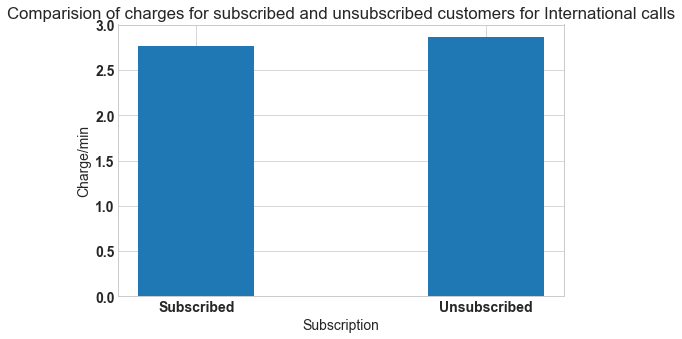

In [22]:
#Visualization
import matplotlib.pyplot as plt
x=['Subscribed','Unsubscribed']
y=[2.77,2.86]
a=plt.bar(x,y,width=0.4)
plt.xlabel('Subscription')
plt.ylabel('Charge/min')
plt.title('Comparision of charges for subscribed and unsubscribed customers for International calls')
a


#### Inference :
From the plot it is observed that the charges for subscribed customer and unsubscribed customer varies for international calls.

In [23]:
df['DC/min']=df['q_DayCharge']/df['q_DayMins']
df['EC/min']=df['q_EveCharge']/df['q_EveMins']
df['NC/min']=df['q_NightCharge']/df['q_NightMins']
df['IC/min']=df['q_InternationalCharge']/df['q_InternationalMins']
df

,c_AreaCode,c_InternationalPlan,c_Phone,c_State,c_VMailPlan,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayCharge,q_DayMins,...,q_Internationalcalls,q_NightCalls,q_NightCharge,q_NightMins,q_VMailMessage,y_Churn,DC/min,EC/min,NC/min,IC/min
0,415,no,382-4657,KS,yes,128,1,110,45.07,265.1,...,3,91,11.01,244.7,25,False.,0.170011,0.085005,0.044994,0.270000
1,415,no,371-7191,OH,yes,107,1,123,27.47,161.6,...,3,103,11.45,254.4,26,False.,0.169988,0.085013,0.045008,0.270073
2,415,no,358-1921,NJ,no,137,0,114,41.38,243.4,...,5,104,7.32,162.6,0,False.,0.170008,0.084983,0.045018,0.269672
3,408,yes,375-9999,OH,no,84,2,71,50.90,299.4,...,7,89,8.86,196.9,0,False.,0.170007,0.084976,0.044997,0.269697
4,415,yes,330-6626,OK,no,75,3,113,28.34,166.7,...,3,121,8.41,186.9,0,False.,0.170006,0.085030,0.044997,0.270297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,510,no,345-7512,NY,yes,57,3,81,24.48,144.0,...,6,122,7.14,158.6,25,False.,0.170000,0.084989,0.045019,0.270588
4613,408,no,343-6820,NM,yes,177,3,91,32.13,189.0,...,1,116,7.36,163.6,29,False.,0.170000,0.084988,0.044988,0.270064
4614,408,no,338-4794,VT,yes,67,1,126,21.68,127.5,...,3,91,9.04,200.9,33,False.,0.170039,0.085005,0.044998,0.270000
4615,415,no,355-8388,MI,yes,98,0,98,28.71,168.9,...,3,96,7.45,165.5,23,False.,0.169982,0.085020,0.045015,0.269930


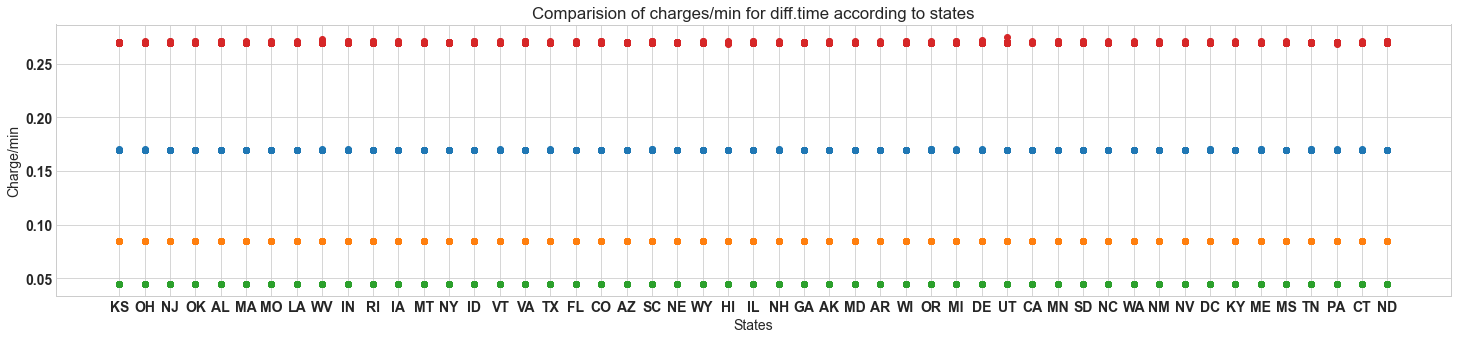

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_size_inches(25,5)
x=df['c_State']
y1=df['DC/min']
y2=df['EC/min']
y3=df['NC/min']
y4=df['IC/min']
a=plt.scatter(x,y1)
b=plt.scatter(x,y2)
c=plt.scatter(x,y3)
d=plt.scatter(x,y4)
plt.xlabel('States')
plt.ylabel('Charge/min')
plt.title('Comparision of charges/min for diff.time according to states')
a


#### Inference :
From the above plot it is observed that the charges doesn't vary much from state to state. So the c_State column can be dropped

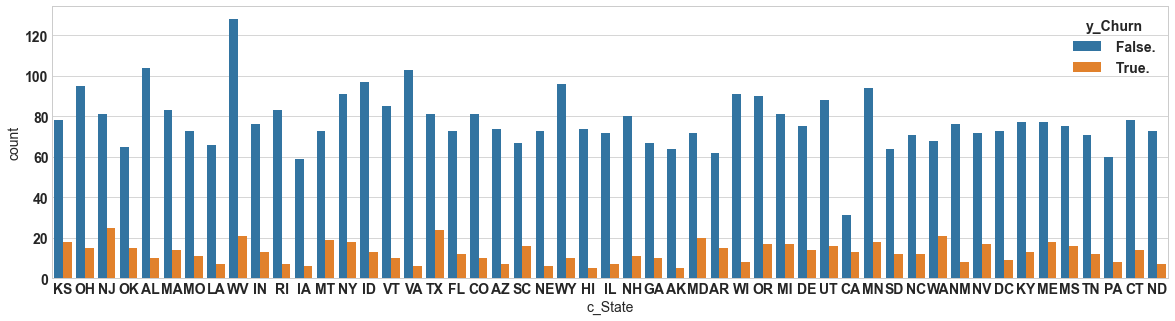

In [25]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='c_State', hue="y_Churn", data=df)

In [26]:
max_acl=df['q_AccountLength'].max()
min_acl=df['q_AccountLength'].min()
print("The maximum account length :",max_acl)
print("The minimum account length :",min_acl)

The maximum account length : 243
The minimum account length : 1


In [27]:
df.iloc[817]

c_AreaCode                     510
c_InternationalPlan             no
c_Phone                   355-9360
c_State                         UT
c_VMailPlan                     no
q_AccountLength                243
q_CustServCalls                  2
q_DayCalls                      92
q_DayCharge                  16.24
q_DayMins                     95.5
q_EveCalls                      63
q_EveCharge                  13.91
q_EveMins                    163.7
q_InternationalCharge         1.78
q_InternationalMins            6.6
q_Internationalcalls             6
q_NightCalls                   118
q_NightCharge                11.89
q_NightMins                  264.2
q_VMailMessage                   0
y_Churn                     False.
DC/min                    0.170052
EC/min                    0.084973
NC/min                    0.045004
IC/min                    0.269697
Name: 817, dtype: object

In [28]:
df.iloc[245]

c_AreaCode                     408
c_InternationalPlan             no
c_Phone                   331-5138
c_State                         SC
c_VMailPlan                     no
q_AccountLength                 22
q_CustServCalls                  0
q_DayCalls                     107
q_DayCharge                  18.75
q_DayMins                    110.3
q_EveCalls                      93
q_EveCharge                  14.15
q_EveMins                    166.5
q_InternationalCharge         2.57
q_InternationalMins            9.5
q_Internationalcalls             5
q_NightCalls                    96
q_NightCharge                  9.1
q_NightMins                  202.3
q_VMailMessage                   0
y_Churn                     False.
DC/min                    0.169991
EC/min                    0.084985
NC/min                    0.044983
IC/min                    0.270526
Name: 245, dtype: object

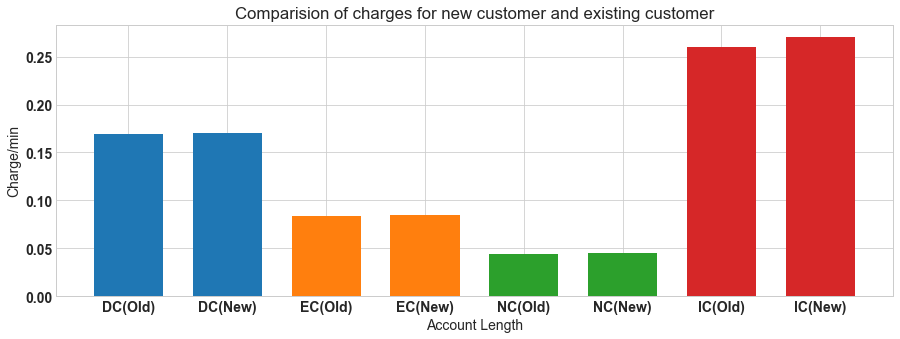

In [29]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_size_inches(15,5)
x1=['DC(Old)','DC(New)']
y1=[0.169,0.170]
x2=['EC(Old)','EC(New)']
y2=[0.084,0.085]
x3=['NC(Old)','NC(New)']
y3=[0.044,0.045]
x4=['IC(Old)','IC(New)']
y4=[0.26,0.27]
plt.bar(x1,y1,width=0.7)
plt.bar(x2,y2,width=0.7)
plt.bar(x3,y3,width=0.7)
plt.bar(x4,y4,width=0.7)
plt.xlabel('Account Length')
plt.ylabel('Charge/min')
plt.title('Comparision of charges for new customer and existing customer')
plt.show()


### Inference:
The charges for low account length customer and high account length customer remains the same. So account length column can be dropped.

In [30]:
statechurncount=df.groupby("c_State").y_Churn .value_counts()
statechurncount

c_State  y_Churn
AK        False.     64
          True.       5
AL        False.    104
          True.      10
AR        False.     62
                   ... 
WI        True.       8
WV        False.    128
          True.      21
WY        False.     96
          True.      10
Name: y_Churn, Length: 102, dtype: int64

### Explore class variable

In [71]:
df['y_Churn'].value_counts()

 False.    3961
 True.      656
Name: y_Churn, dtype: int64

The y_Chrunis the target variable which is ordinal in nature.

In [32]:
ip_churn=df.groupby("c_InternationalPlan").y_Churn .value_counts()
ip_churn

c_InternationalPlan  y_Churn
 no                   False.    3701
                      True.      470
 yes                  False.     260
                      True.      186
Name: y_Churn, dtype: int64

### Correlation

In [33]:
correlation=df.corr().abs()
correlation

,c_AreaCode,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayCharge,q_DayMins,q_EveCalls,q_EveCharge,q_EveMins,q_InternationalCharge,q_InternationalMins,q_Internationalcalls,q_NightCalls,q_NightCharge,q_NightMins,q_VMailMessage,DC/min,EC/min,NC/min,IC/min
c_AreaCode,1.000000,0.020394,0.021046,0.013179,0.018903,0.018900,0.011528,0.011533,0.011513,0.007386,0.007292,0.011531,0.015316,0.002782,0.002794,0.002597,0.014331,0.023385,0.004466,0.014661
q_AccountLength,0.020394,1.000000,0.002620,0.032783,0.001999,0.002002,0.015598,0.006775,0.006778,0.003501,0.003483,0.023485,0.009482,0.002095,0.002077,0.012983,0.001995,0.014497,0.020796,0.011580
q_CustServCalls,0.021046,0.002620,1.000000,0.008747,0.008155,0.008149,0.007730,0.015611,0.015598,0.016148,0.016079,0.016778,0.010258,0.013868,0.013871,0.006951,0.018327,0.014045,0.001603,0.029188
q_DayCalls,0.013179,0.032783,0.008747,1.000000,0.002821,0.002823,0.003923,0.006429,0.006430,0.013055,0.012951,0.010889,0.013299,0.010724,0.010730,0.003846,0.005004,0.009264,0.006709,0.008493
q_DayCharge,0.018903,0.001999,0.008155,0.002821,1.000000,1.000000,0.012992,0.010262,0.010255,0.012262,0.012315,0.000163,0.005164,0.009593,0.009606,0.009025,0.045677,0.011786,0.013106,0.015359
q_DayMins,0.018900,0.002002,0.008149,0.002823,1.000000,1.000000,0.012990,0.010268,0.010260,0.012261,0.012314,0.000166,0.005165,0.009591,0.009604,0.009028,0.045904,0.011783,0.013099,0.015362
q_EveCalls,0.011528,0.015598,0.007730,0.003923,0.012992,0.012990,1.000000,0.001151,0.001135,0.002831,0.002798,0.005198,0.015463,0.002624,0.002610,0.006508,0.005130,0.022399,0.010932,0.000118
q_EveCharge,0.011533,0.006775,0.015611,0.006429,0.010262,0.010268,0.001151,1.000000,1.000000,0.000170,0.000163,0.005751,0.014231,0.018846,0.018839,0.017878,0.017246,0.035968,0.000705,0.000293
q_EveMins,0.011513,0.006778,0.015598,0.006430,0.010255,0.010260,0.001135,1.000000,1.000000,0.000172,0.000165,0.005749,0.014226,0.018837,0.018830,0.017872,0.017242,0.036596,0.000701,0.000285
q_InternationalCharge,0.007386,0.003501,0.016148,0.013055,0.012262,0.012261,0.002831,0.000170,0.000172,1.000000,0.999993,0.021548,0.006439,0.004497,0.004500,0.005202,0.008715,0.006301,0.008879,0.087671


In [34]:
#To find highly correlated continuos columns (Pearson Correlation is used for cont-cont columns)
hcorr_features=set()
x=0.95
for i in range(len(correlation.columns)):
    for j in range(i):
        if(correlation.iloc[i,j])>x:
            colname=correlation.columns[i]
            hcorr_features.add(colname)
print("Highly co-related continuos columns",hcorr_features)

Highly co-related continuos columns {'q_DayMins', 'q_EveMins', 'q_InternationalMins', 'q_NightMins'}


### Droping the highly correleated values from visulaization 

In [35]:
df.drop('q_NightMins',axis=1,inplace=True)
df.drop('q_EveMins',axis=1,inplace=True)
df.drop('q_DayMins',axis=1,inplace=True)
df.drop('q_InternationalMins',axis=1,inplace=True)
df.drop('c_VMailPlan',axis=1,inplace=True) #This can be dropped because there are charges for subscribed customer and zero for unsubscribed customer
df.drop('c_AreaCode',axis=1,inplace=True)
df.drop('c_Phone',axis=1,inplace=True)
df.drop('q_AccountLength',axis=1,inplace=True)
df.drop('c_State',axis=1,inplace=True)
df.drop('q_CustServCalls',axis=1,inplace=True)
df.drop('DC/min',axis=1,inplace=True)
df.drop('EC/min',axis=1,inplace=True)
df.drop('NC/min',axis=1,inplace=True)
df.drop('IC/min',axis=1,inplace=True)

In [36]:
df

,c_InternationalPlan,q_DayCalls,q_DayCharge,q_EveCalls,q_EveCharge,q_InternationalCharge,q_Internationalcalls,q_NightCalls,q_NightCharge,q_VMailMessage,y_Churn
0,no,110,45.07,99,16.78,2.70,3,91,11.01,25,False.
1,no,123,27.47,103,16.62,3.70,3,103,11.45,26,False.
2,no,114,41.38,110,10.30,3.29,5,104,7.32,0,False.
3,yes,71,50.90,88,5.26,1.78,7,89,8.86,0,False.
4,yes,113,28.34,122,12.61,2.73,3,121,8.41,0,False.
...,...,...,...,...,...,...,...,...,...,...,...
4612,no,81,24.48,112,15.91,2.30,6,122,7.14,25,False.
4613,no,91,32.13,96,25.76,4.24,1,116,7.36,29,False.
4614,no,126,21.68,129,25.17,3.51,3,91,9.04,33,False.
4615,no,98,28.71,117,19.24,3.86,3,96,7.45,23,False.


### Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()
for i in (0,1,1):
    df.iloc[:,i] = l_enc.fit_transform(df.iloc[:,i])
df

,c_InternationalPlan,q_DayCalls,q_DayCharge,q_EveCalls,q_EveCharge,q_InternationalCharge,q_Internationalcalls,q_NightCalls,q_NightCharge,q_VMailMessage,y_Churn
0,0,74,45.07,99,16.78,2.70,3,91,11.01,25,False.
1,0,87,27.47,103,16.62,3.70,3,103,11.45,26,False.
2,0,78,41.38,110,10.30,3.29,5,104,7.32,0,False.
3,1,35,50.90,88,5.26,1.78,7,89,8.86,0,False.
4,1,77,28.34,122,12.61,2.73,3,121,8.41,0,False.
...,...,...,...,...,...,...,...,...,...,...,...
4612,0,45,24.48,112,15.91,2.30,6,122,7.14,25,False.
4613,0,55,32.13,96,25.76,4.24,1,116,7.36,29,False.
4614,0,90,21.68,129,25.17,3.51,3,91,9.04,33,False.
4615,0,62,28.71,117,19.24,3.86,3,96,7.45,23,False.


In [38]:
y = df.y_Churn
X = df.iloc[:,:-1]

### Splitting datas into train and test datas

In [39]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### Feature engineering
- checking the data types of the variable after splitting 

In [40]:
# check data types in X_train

X_train.dtypes

c_InternationalPlan        int32
q_DayCalls                 int64
q_DayCharge              float64
q_EveCalls                 int64
q_EveCharge              float64
q_InternationalCharge    float64
q_Internationalcalls       int64
q_NightCalls               int64
q_NightCharge            float64
q_VMailMessage             int64
dtype: object

### Train the model using DecisionTreeClassifier 

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

### Evaluating the accuracy of the model 

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8560606060606061


### Optimizing the performance of the decision tree model 

- Criteria choosen is "entropy" and "gini"<br>
- max_depth is given as 3 for our model

#### Decision Tree Classifier with criterion entropy index 

In [62]:
# Create Decision Tree classifer object
clf_en = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf_en = clf_en.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_en.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9036796536796536


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

#### Compare the train-set and test-set accuracy
Now, we are comparing the train-set and test-set accuracy to check for overfitting.

In [63]:
y_pred_train_entropy = clf_en.predict(X_train)

y_pred_train_entropy

array([' False.', ' False.', ' False.', ..., ' False.', ' False.',
       ' False.'], dtype=object)

In [64]:
from sklearn.metrics import accuracy_score
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_entropy)))

Training-set accuracy score: 0.8993


#### Check for overfitting and underfitting 

In [65]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8993
Test set score: 0.9037


Here,the training-set accuracy score is 0.8985 while the test-set accuracy to be 0.9048. These two values are quite comparable. So, there is no sign of overfitting.

-------------------------------------------------------------------------------------------------------------------------------

#### Decision Tree Classifier with criterion gini index 

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9047619047619048


#### Compare the train-set and test-set accuracy
Now, we are comparing the train-set and test-set accuracy to check for overfitting.


In [50]:
y_pred_train_gini = clf.predict(X_train)

y_pred_train_gini

array([' False.', ' False.', ' False.', ..., ' False.', ' False.',
       ' False.'], dtype=object)

In [52]:
from sklearn.metrics import accuracy_score
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8985


#### Check for overfitting and underfitting 

In [54]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8985
Test set score: 0.9048


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.8985 while the test-set accuracy to be 0.9048. These two values are quite comparable. So, there is no sign of overfitting.

Now, based on the above analysis we can conclude that our classification model accuracy is very good.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue. 

### Summary: 

-In this project, we have build a Decision-Tree Classifier model to predict the churn rate.<br> 
-We build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.90.<br>
-In the model with criterion gini index, the training-set accuracy score is 0.8985 while the test-set accuracy to be 0.9048. These two values are quite comparable. So, there is no sign of overfitting.<br>
-Similarly, in the model with criterion entropy, the training-set accuracy score is 0.8993 while the test-set accuracy to be 0.9037.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
